In [48]:
using divand
using NCDatasets
using PyPlot
Pkg.status("NCDatasets")

 - NCDatasets                    0.0.10


In [68]:
function loadaviso(datafile::String, varname="SLA")
    ds = Dataset(datafile, "r");
    # @show ds;
    # Get coordinates
    obslon = ds["longitude"][:];
    obslat = ds["latitude"][:];
    obstime = ds["time"][:];
    obsval = ds[varname][:];
    obsdepth = zeros(obsval);
    # Shift longitudes
    obslon = shiftlon(obslon);
    close(ds)
    return obsval,obslon,obslat,obsdepth,obstime
end;

In [117]:
function loadaviso(filelist::AbstractVector, varname="SLA")
    
    obsvallist,obslonlist,obslatlist,obsdepthlist,obstimelist = loadaviso(filelist[1], varname)
    for datafile in filelist[2:end]
        obsval,obslon,obslat,obsdepth,obstime = loadaviso(datafile, varname)
        obslonlist = vcat(obslonlist, obslon);
        obslatlist = vcat(obslatlist, obslat);
        obsdepthlist = vcat(obsdepthlist, obsdepth);
        obstimelist = vcat(obstimelist, obstime);
        obsvallist = vcat(obsvallist, obsval);
    end
    
    return obsvallist,obslonlist,obslatlist,obsdepthlist,obstimelist
end;

In [118]:
function shiftlon(longitude)
    sel_lon = (longitude.>180.);
    longitude[sel_lon] = longitude[sel_lon] - 360.;
    return longitude
end;

## Files and directories

In [151]:
datadir = "/home/ctroupin/Projects/Altimetry-Interpolation/data/AVISO/"
bathname = "gebco_30sec_16.nc"

"gebco_30sec_16.nc"

## Analysis parameters
### Grid

In [107]:
dx = 0.5;
dy = 0.5;
lonr = -6.75:dx:40.; 
latr = 30.:dy:48.;
daystart = DateTime(2014,1,1,0,0);
dayendd = DateTime(2015,1,1,0,0);

## Bathymetry and mask

In [150]:
if !isfile(bathname)
    download("https://b2drop.eudat.eu/s/o0vinoQutAC7eb0/download",bathname)
else
    info("Bathymetry file already downloaded")
end

bathisglobal = true
bx,by,b = extract_bath(bathname,bathisglobal,lonr,latr);
xmask,ymask,mmask = load_mask(bathname,true,lonr,latr,[0]);

INFO: Bathymetry file already downloaded
INFO: Extracting bathymetry from file: gebco_30sec_16.nc
INFO: Working with a global bathymetry
INFO: Creating land-sea mask on level: 0
INFO: Extracting bathymetry from file: gebco_30sec_16.nc
INFO: Working with a global bathymetry


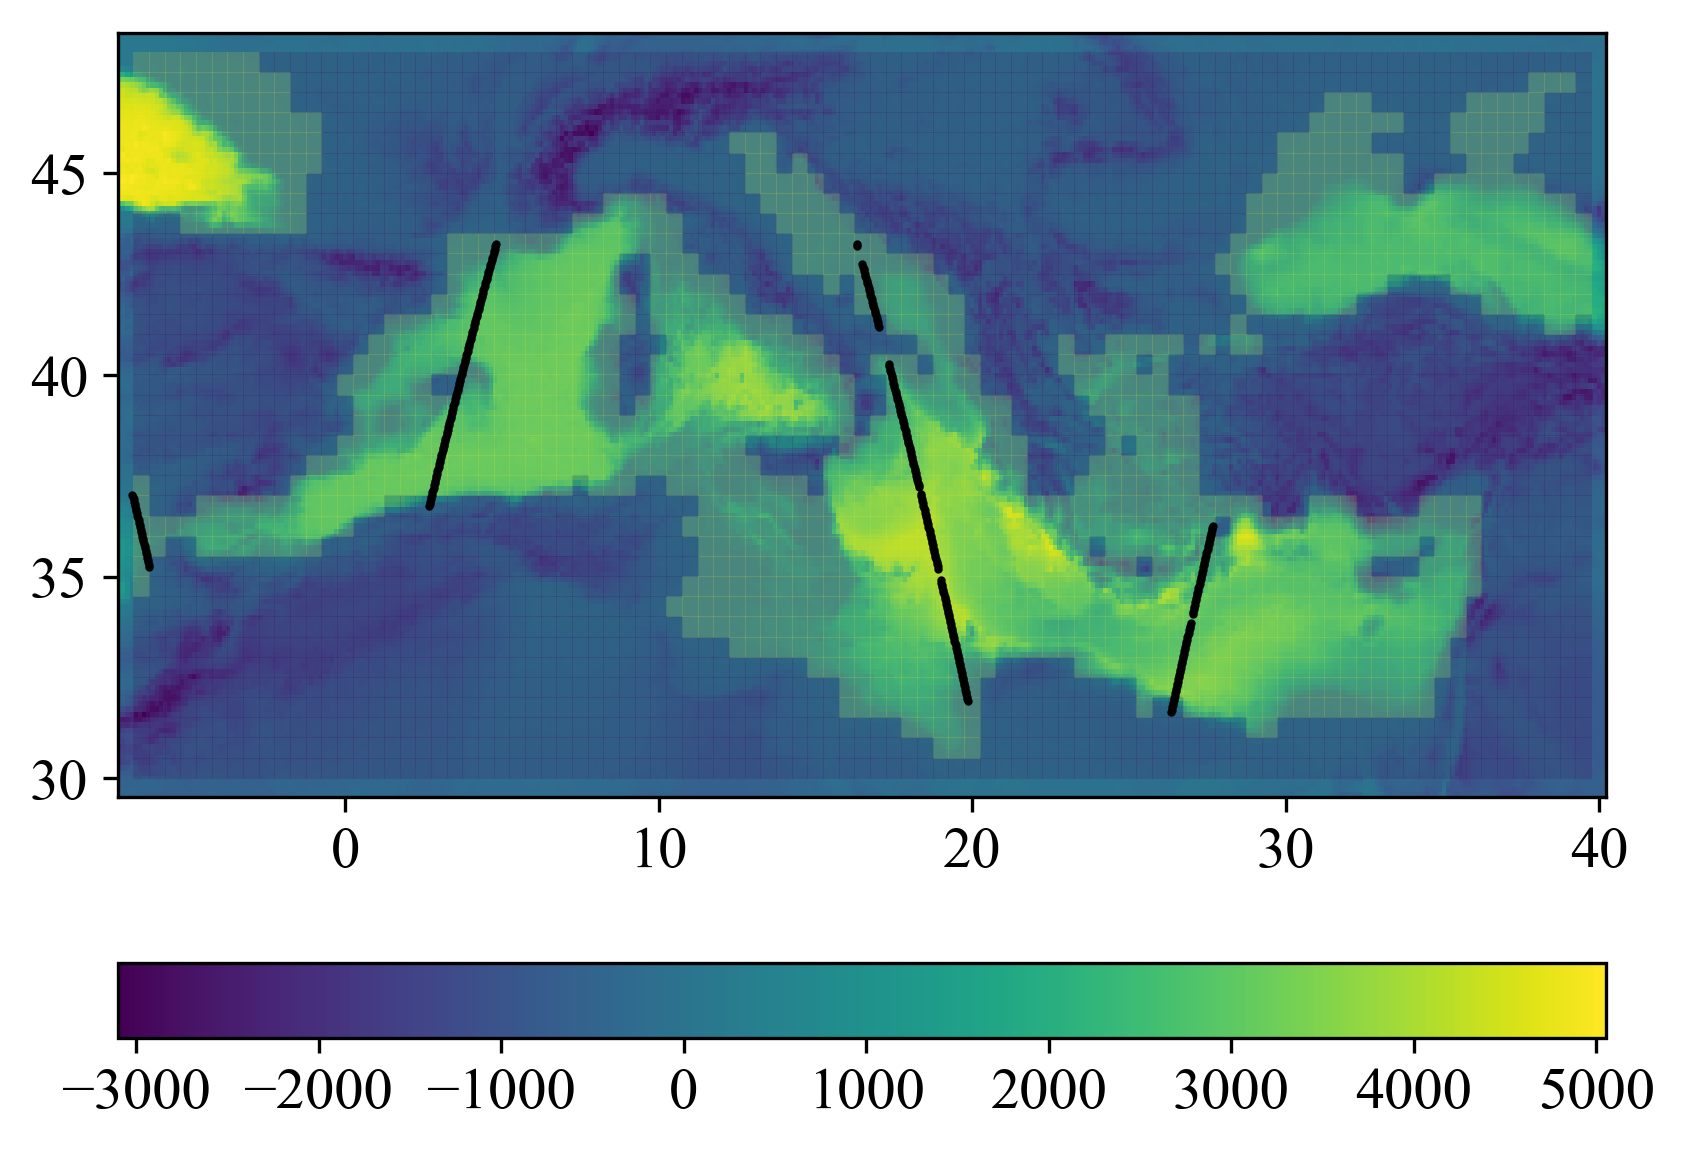

In [59]:
pcolor(bx,by,b'); colorbar(orientation="horizontal")
gca()[:set_aspect](1/cos(mean([ylim()...]) * pi/180))
plot(lon, lat, "ko", markersize=1)
pcolor(xmask,ymask,Float64.(mmask[:,:,1])', alpha=.15); 

In [115]:
filelist = [joinpath(datadir, "dt_med_al_sla_vxxc_20140101_20140829.nc"),
            joinpath(datadir, "dt_med_al_sla_vxxc_20140102_20140829.nc"),
            joinpath(datadir, "dt_med_al_sla_vxxc_20140103_20140829.nc")]

3-element Array{String,1}:
 "/home/ctroupin/Projects/Altimetry-Interpolation/data/AVISO/dt_med_al_sla_vxxc_20140101_20140829.nc"
 "/home/ctroupin/Projects/Altimetry-Interpolation/data/AVISO/dt_med_al_sla_vxxc_20140102_20140829.nc"
 "/home/ctroupin/Projects/Altimetry-Interpolation/data/AVISO/dt_med_al_sla_vxxc_20140103_20140829.nc"

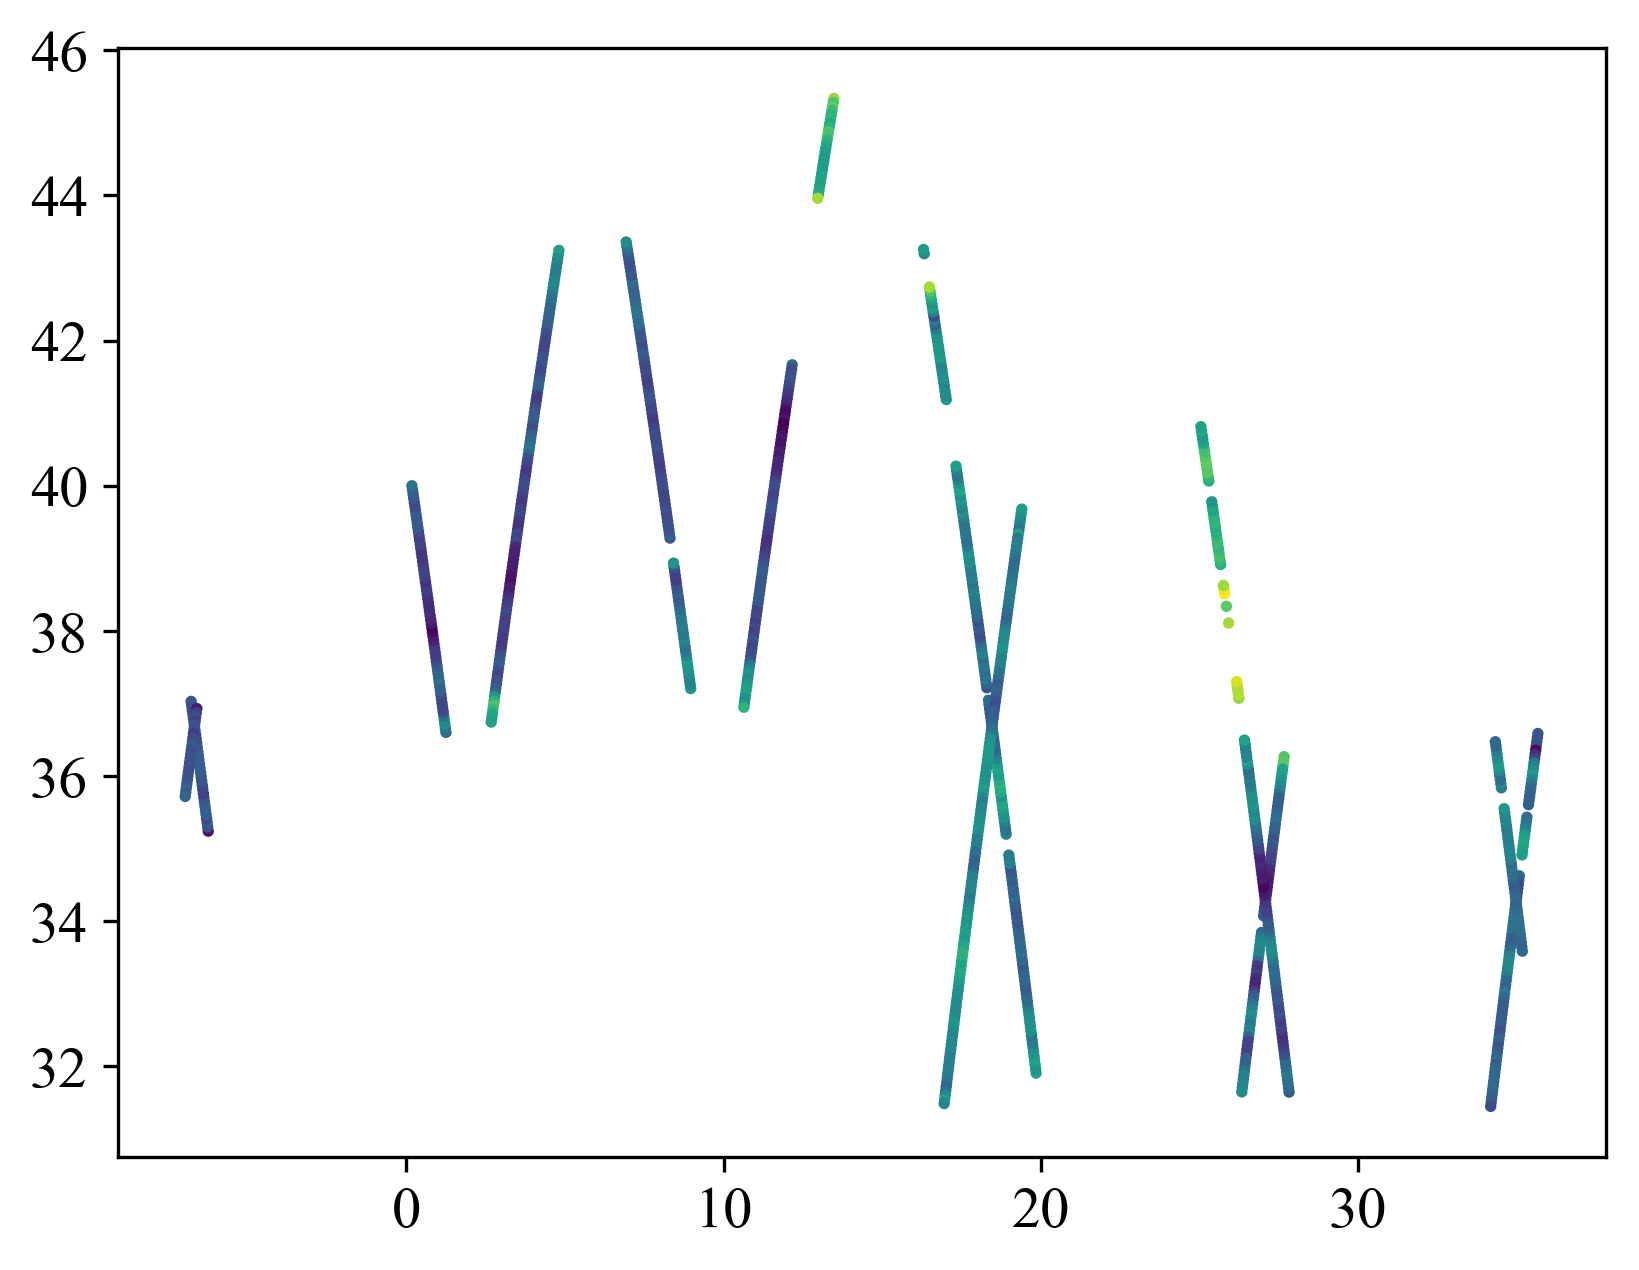

PyObject <matplotlib.collections.PathCollection object at 0x7fb0942fc210>

In [121]:
obsval,obslon,obslat,obsdepth,obstime = loadaviso(filelist);
scatter(obslon, obslat, c=obsval, s=3)

## Analysis parameters

In [122]:
sz = (length(lonr),length(latr),length(timer))
lenx = fill(200_000.,sz)
leny = fill(200_000.,sz)
lent = fill(5.,sz)

LoadError: [91mUndefVarError: timer not defined[39m

In [123]:
epsilon2 = 0.01

0.01

In [125]:
dd = dateobstime[1]

2014-01-01T04:23:24.463

In [128]:
DateTime.

search:

Couldn't find datetime2julian
Perhaps you meant DateTime


No documentation found.

Binding `datetime2julian` does not exist.


In [129]:
using Dates

In [131]:
?datetime2unix

search: datetime2unix datetime2julian datetime2rata



```
datetime2unix(dt::DateTime) -> Float64
```

Takes the given `DateTime` and returns the number of seconds since the unix epoch `1970-01-01T00:00:00` as a [`Float64`](@ref).


In [133]:
datetime2unix(obstime);

LoadError: [91mMethodError: no method matching datetime2unix(::DataArrays.DataArray{DateTime,1})[0m
Closest candidates are:
  datetime2unix([91m::DateTime[39m) at dates/conversions.jl:58
  datetime2unix([91m::AbstractArray{T<:DateTime,N} where N[39m) where T<:DateTime at deprecated.jl:56[39m

In [138]:
# Convert the dates in seconds since the unix epoch 1970-01-01
obstimesec = map(x -> datetime2unix(x), obstime);

2015-01-01T00:00:00

In [145]:
dater = collect(daystart:Dates.Day(1):dayendd);

In [146]:
# Convert to seconds
timer = map(x -> datetime2unix(x), dater);

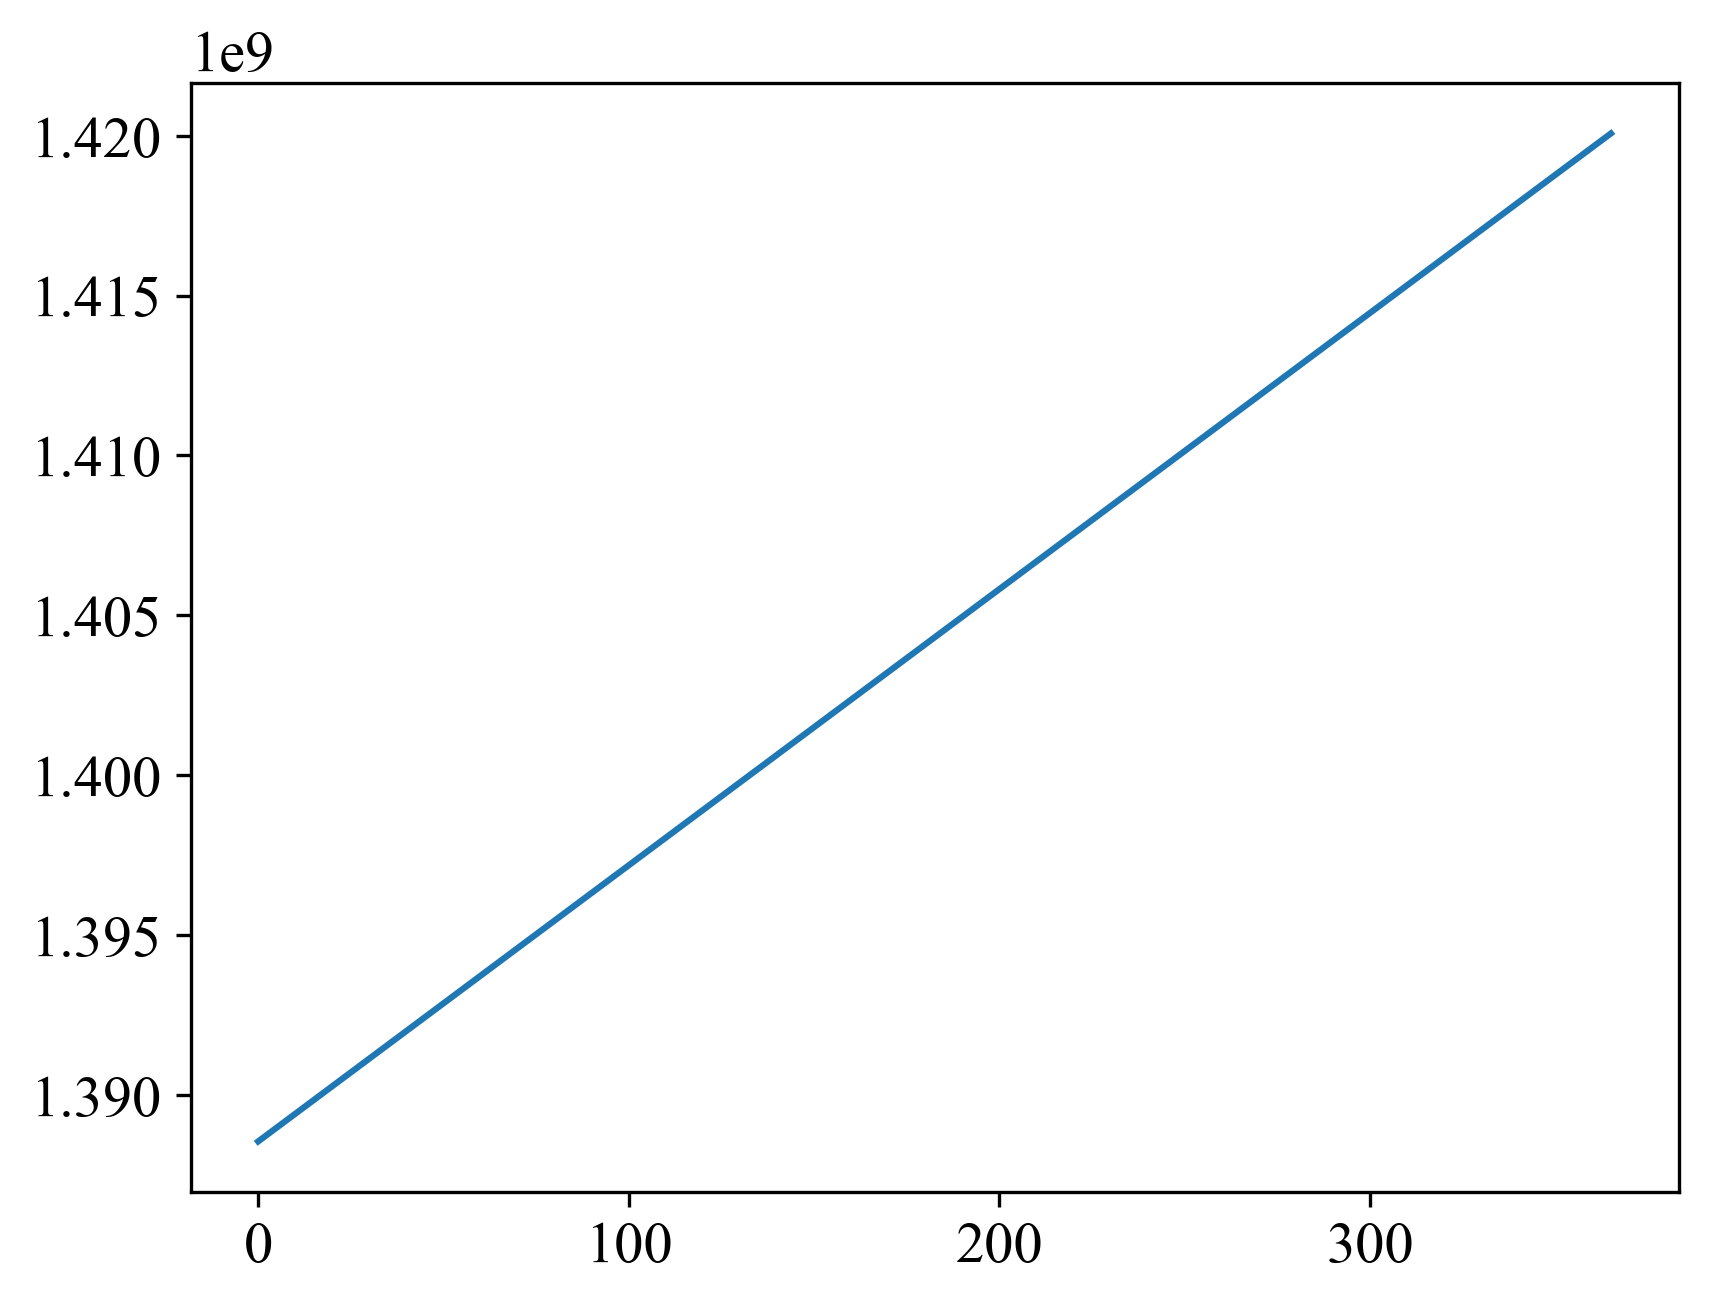

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb09423b3d0>

In [148]:
plot(timer)